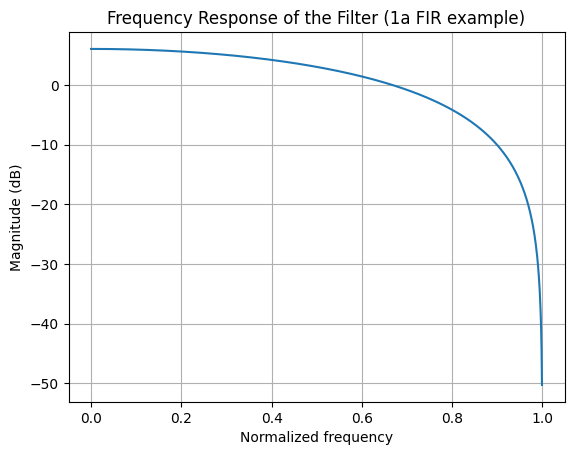

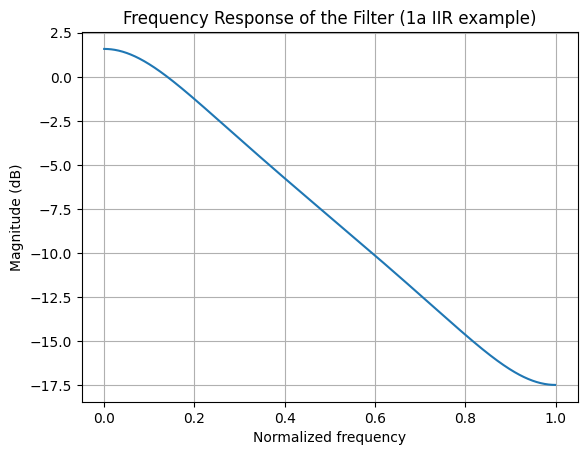

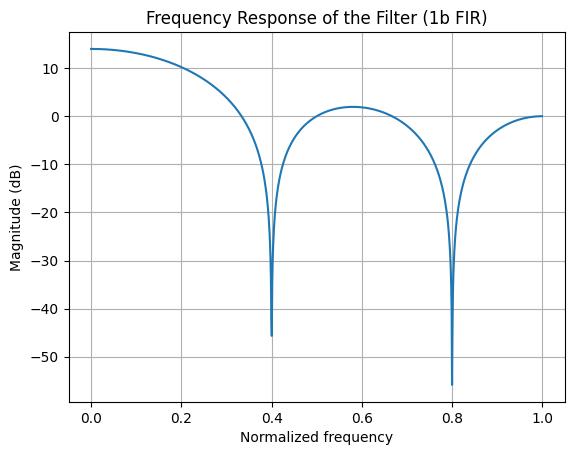

c:\Users\Lmaoi\anaconda3\envs\huggingface_env\lib\site-packages\scipy\signal\_filter_design.py:482: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
c:\Users\Lmaoi\anaconda3\envs\huggingface_env\lib\site-packages\scipy\signal\_filter_design.py:482: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


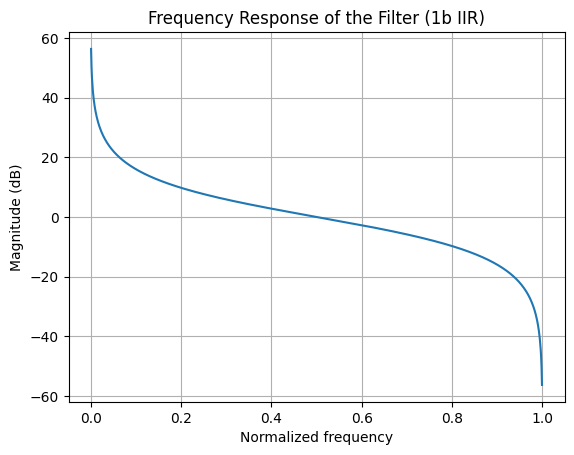

In [ ]:
#Lakshya Vason
#Lab 1 
#ECEN-432 
#UIN: 732007799

''' 1a) Digital filters are broadly classified into FIR and IIR filters. 
Give an example of an FIR filter and IIR filter (transfer function). 
Plot the transfer function in Python. Identify the poles and zeros on the plot.

1b) Consider the transfer functions,
H1(z) = (1 + z^(-1) + z^(-2) + z^(-3) + z^(-4))/1
H2(z) = (1 + z^(-1)) / (1 - z^(-1))
Identify the FIR and IIR filter. Plot the FIR filter in (use freqz function in
the SciPy signal processing toolbox). Where are the poles and zeros of the
filter located? Validate your theory using simulations.

1c) Comment on the stability of the FIR and IIR filters. Use simple simulations
to explain your ideas.
'''

from scipy.signal import freqz
import numpy as np
import matplotlib.pyplot as plt
# 1a


#FIR example
b = np.array([1, 1])
a = np.array([1])

# Compute frequency response
w, h = freqz(b, a, worN=1024)

# Plot magnitude response
plt.figure()
plt.plot(w/np.pi, 20*np.log10(abs(h)))
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Response of the Filter (1a FIR example)')
plt.grid(True)
plt.show()

#IIR example

b0 = np.array([0.2, 0.4])
a0 = np.array([1, -0.5])

# Compute frequency response
w0, h0 = freqz(b0, a0, worN=1024)

# Plot magnitude response
plt.figure()
plt.plot(w0/np.pi, 20*np.log10(abs(h0)))
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Response of the Filter (1a IIR example)')
plt.grid(True)
plt.show()



# 1b


b1 = np.array([1, 1, 1, 1, 1])
a1 = np.array([1])

# Compute frequency response
w1, h1 = freqz(b1, a1, worN=1024)

# Plot magnitude response
plt.figure()
plt.plot(w1/np.pi, 20*np.log10(abs(h1)))
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Response of the Filter (1b FIR)')
plt.grid(True)
plt.show()


b2 = np.array([1, 1])
a2 = np.array([1, -1])

# Compute frequency response
w2, h2 = freqz(b2, a2, worN=1024)

# Plot magnitude response
plt.figure()
plt.plot(w2/np.pi, 20*np.log10(abs(h2)))
plt.xlabel('Normalized frequency')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Response of the Filter (1b IIR)')
plt.grid(True)
plt.show()




Location of poles and zeros can be determined from the coefficients of b and a.
For FIR filters, all poles are at the origin (z=0) and zeros are determined by the roots of b.
For IIR filters, poles are determined by the roots of a and zeros by the roots of b.

**1a**
FIR, 

Zero: z = -1\
Pole: z = 0

IIR, 

Zero: z = -2\
Pole: z = 0.5

**1b**

FIR, 

Zero: z = [ 0.309+0.9511j  0.309-0.9511j -0.809+0.5878j -0.809-0.5878j]\
Pole: z = 0

IIR, 

Zero: z = -1\
Pole: z = 1

**1c**
FIR filters are more stable because they have Poles on Z=0 and do not have exponential feedback loops. 

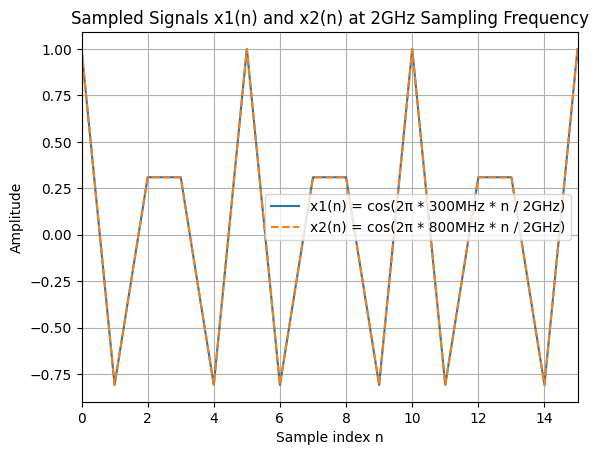

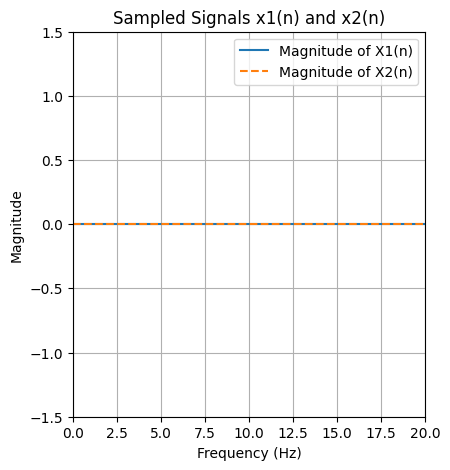

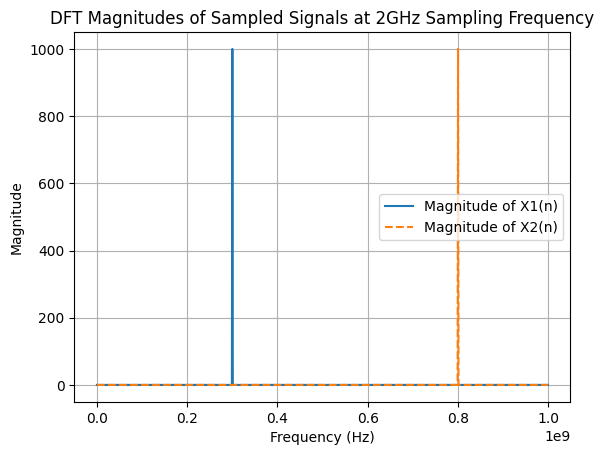

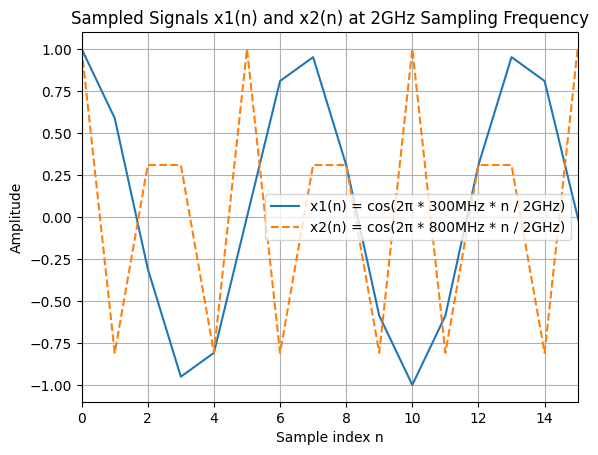

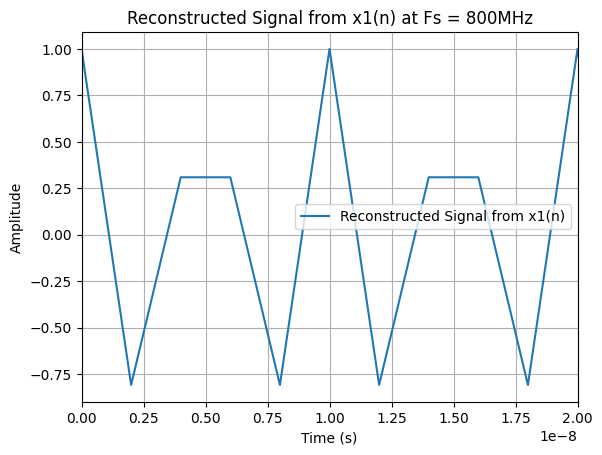

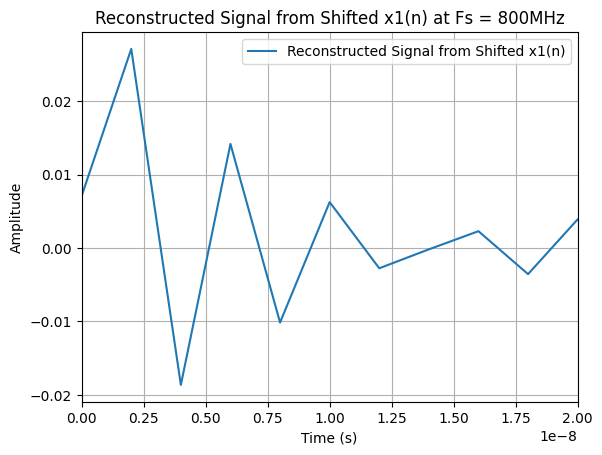

Mean Square Error (Original Sampling): 6.920052418216139e-27
Mean Square Error (Shifted Sampling): 0.499970467186583


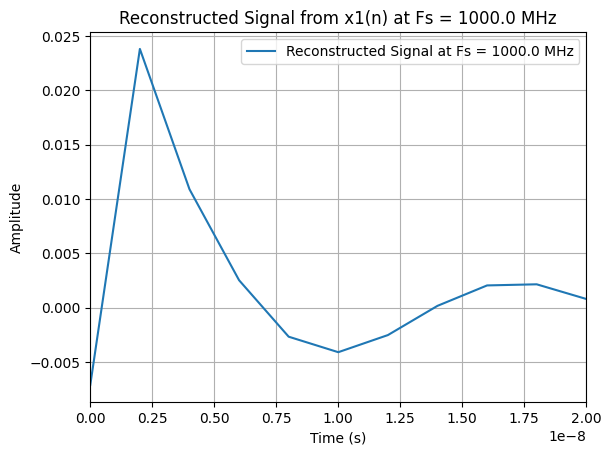

Mean Square Error at Fs = 1000.0 MHz: 0.5000904388818951


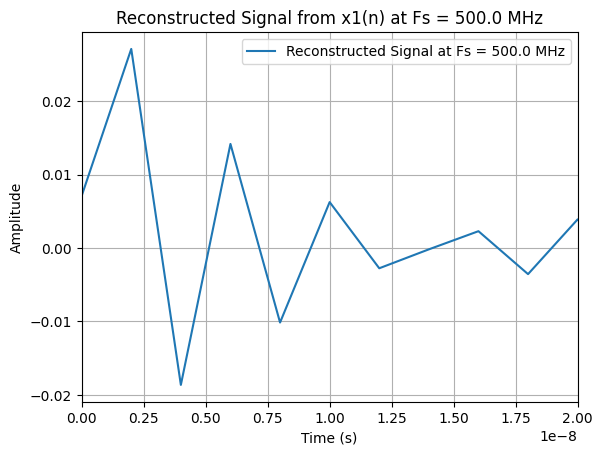

Mean Square Error at Fs = 500.0 MHz: 0.499970467186583


In [ ]:
'''2a) Consider the two signals x1(t) = cos( 2π ∙ F1 ∙ t) and x2(t) = cos( 2π ∙
F2 ∙ t), where F1 = 300MHz and F2 = 800MHz. Both these signals are
sampled at the same sampling frequency Fs = 500MHz. What can you say
about the sampled data x1(n) and x2(n)? Explain with simulations why this
happens.

2b) Can you recover the signals x1(t) and x2(t) from x1(n) and x2(n). If not,
what is your suggestion to overcome this problem?


2c) Find the ideal signal reconstruction (interpolation) equation for a zero-
order hold sampling system with pulse width W and sampling rate T.

Assume that Nyquist rate criteria is satisfied and the sampling point is at
the end of the pulse width.


2d) Sample the signal x1(t) using Fs = 800MHz at 0:Ts:T-Ts, where T = 10/F1
(i.e. 10 cycles of the cosine wave) and Ts = 1/Fs. Reconstruct the signal
from the samples using the formula,


Now sample the signal at Ts/2:Ts:T-Ts/2 i.e. the samples are shifted by
Ts/2. Reconstruct the signal using the same formula. Compute the error in
the reconstruction in both the cases by the method of mean squares given
by,


2e) Repeat d. for Fs = 1000MHz and Fs = 500MHz. Report your observations.

'''




#2a

Fs = 500e6  # Sampling frequency
F1 = 300e6  # Frequency of first signal 
F2 = 800e6  # Frequency of second signal
t = np.arange(0, 1e-6, 1/Fs)
x1 = np.cos(2 * np.pi * F1 * t)
x2 = np.cos(2 * np.pi * F2 * t)
# Sampled signals
n = np.arange(0, len(t))    
x1_n = np.cos(2 * np.pi * F1 * n / Fs)
x2_n = np.cos(2 * np.pi * F2 * n / Fs)
# Plot the sampled signals
plt.figure()    
plt.plot(n, x1_n, label='x1(n) = cos(2π * 300MHz * n / 500MHz)')
plt.plot(n, x2_n, label='x2(n) = cos(2π * 800MHz * n / 500MHz)', linestyle='--')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.title('Sampled Signals x1(n) and x2(n) at 500MHz Sampling Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0, 15)
plt.show()  



#Use DFT to plot the sampled signals x1(n) and x2(n). and make a comparison of their magnitudes.

X1 = np.fft.fft(x1_n)
X2 = np.fft.fft(x2_n)
N = len(X1)
frequencies = np.arange(0, N) * Fs / N  # Frequency axis

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(frequencies[:N//2], np.abs(X1[:N//2]), label='Magnitude of X1(n)')
plt.plot(frequencies[:N//2], np.abs(X2[:N//2]), label='Magnitude of X2(n)', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Magnitudes of Sampled Signals')
plt.legend()
plt.grid(True)
plt.title('Sampled Signals x1(n) and x2(n)')
plt.legend()
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(-1.5, 1.5)
plt.show()

#2b 

Fs_new = 2e9  # New sampling frequency
t_new = np.arange(0, 1e-6, 1/Fs_new)
x1_new = np.cos(2 * np.pi * F1 * t_new) 
x2_new = np.cos(2 * np.pi * F2 * t_new)
# Sampled signals at new frequency  
n_new = np.arange(0, len(t_new))    
x1_n_new = np.cos(2 * np.pi * F1 * n_new / Fs_new)
x2_n_new = np.cos(2 * np.pi * F2 * n_new / Fs_new)
# Plot the new sampled signals      
#Use DFT to plot the sampled signals x1(n) and x2(n). and make a comparison of their magnitudes.

X1_new = np.fft.fft(x1_n_new)
X2_new = np.fft.fft(x2_n_new)
N_new = len(X1_new)
frequencies_new = np.arange(0, N_new) * Fs_new / N_new  # Frequency axis

plt.figure()
plt.plot(frequencies_new[:N_new//2], np.abs(X1_new[:N_new//2]), label='Magnitude of X1(n)')
plt.plot(frequencies_new[:N_new//2], np.abs(X2_new[:N_new//2]), label='Magnitude of X2(n)', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Magnitudes of Sampled Signals at 2GHz Sampling Frequency')
plt.legend()
plt.grid(True)

plt.figure()
plt.plot(n_new, x1_n_new, label='x1(n) = cos(2π * 300MHz * n / 2GHz)')
plt.plot(n_new, x2_n_new, label='x2(n) = cos(2π * 800MHz * n / 2GHz)', linestyle='--')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.title('Sampled Signals x1(n) and x2(n) at 2GHz Sampling Frequency')
plt.legend()
plt.grid(True)
plt.xlim(0, 15)
plt.show()  

#2c 

# Ideal signal reconstruction equation for a zero-order hold sampling system
def zero_order_hold_reconstruction(x_n, T, W, t):   
    reconstructed_signal = np.zeros_like(t)
    for n in range(len(x_n)):
        start_index = int(n * T / (t[1] - t[0]))
        end_index = int(start_index + W / (t[1] - t[0]))
        reconstructed_signal[start_index:end_index] = x_n[n]
    return reconstructed_signal

#2d

xr = x1_n * np.sinc((np.pi *(t - n/Fs))/(1/Fs))
plt.figure()
plt.plot(t, xr, label='Reconstructed Signal from x1(n)')    
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal from x1(n) at Fs = 800MHz')
plt.legend()
plt.xlim(0, 0.2e-7)
plt.grid(True)

#Now sample the signal at Ts/2:Ts:T-Ts/2 i.e. the samples are shifted by
# Ts/2. Reconstruct the signal using the same formula. Compute the error in
# the reconstruction in both the cases by the method of mean squares 

Ts = 1 / 800e6
shifted_samples = np.arange(Ts/2, Ts, Ts - Ts/2)    
x1_shifted_n = np.cos(2 * np.pi * F1 * shifted_samples)
xr_shifted = x1_shifted_n * np.sinc((np.pi *(t - (shifted_samples[:, None])))/(1/Fs))
xr_shifted = np.sum(xr_shifted, axis=0)
plt.figure()
plt.plot(t, xr_shifted, label='Reconstructed Signal from Shifted x1(n)')    
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal from Shifted x1(n) at Fs = 800MHz')
plt.legend()
plt.grid(True)
plt.xlim(0, 0.2e-7)
plt.show()

# Compute mean square error
mse_original = np.mean((x1 - xr)**2)

mse_shifted = np.mean((x1 - xr_shifted)**2)
print(f'Mean Square Error (Original Sampling): {mse_original}')
print(f'Mean Square Error (Shifted Sampling): {mse_shifted}')


#2e

for Fs_test in [1000e6, 500e6]:
    Ts_test = 1 / Fs_test
    samples = np.arange(Ts/2, Ts, Ts - Ts/2)
    x1_test_n = np.cos(2 * np.pi * F1 * samples)
    xr_test = x1_test_n * np.sinc((np.pi *(t - samples[:, None]))/(1/Fs_test))
    xr_test = np.sum(xr_test, axis=0)
    
    mse_test = np.mean((x1 - xr_test)**2)
    plt.figure()
    plt.plot(t, xr_test, label=f'Reconstructed Signal at Fs = {Fs_test/1e6} MHz')    
    plt.xlabel('Time (s)')

    plt.ylabel('Amplitude')
    plt.title(f'Reconstructed Signal from x1(n) at Fs = {Fs_test/1e6} MHz')
    plt.legend()        
    plt.grid(True)
    plt.xlim(0, 0.2e-7)
    plt.show()
    print(f'Mean Square Error at Fs = {Fs_test/1e6} MHz: {mse_test}')




**2b**
To recover the original signals, we need to sample at a frequency greater than twice the highest frequency component (Nyquist rate).
Here, the highest frequency is 800MHz, so we should sample at a frequency greater than 1.6GHz i.e. 2GHz. The signal is still not fully recoverable due to aliasing. 

**2e**
Observations:
1. As the sampling frequency increases, the mean square error in the reconstruction decreases,    
indicating a more accurate reconstruction of the original signal.
2. The shifted sampling also affects the reconstruction quality, with different mean square errors    
observed for original and shifted sampling points.

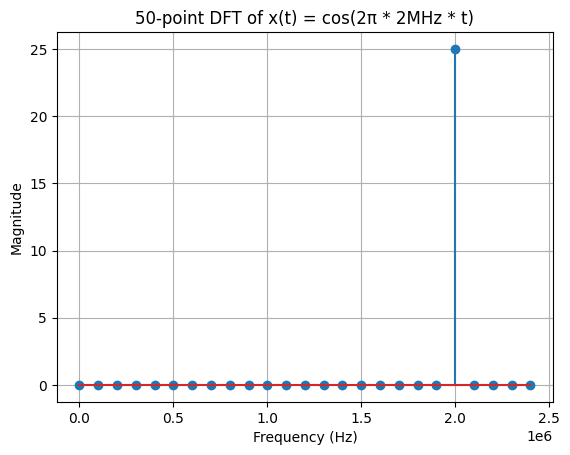

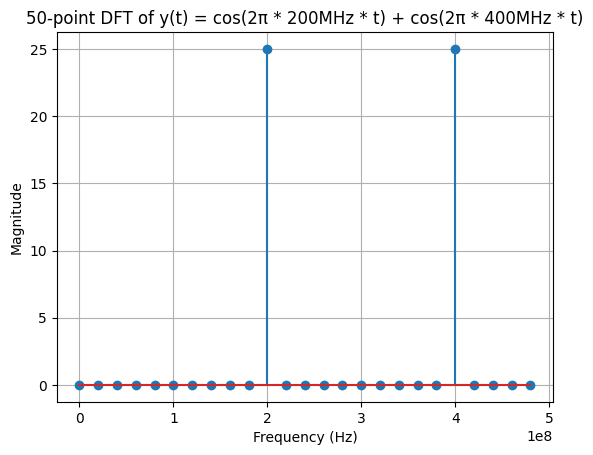

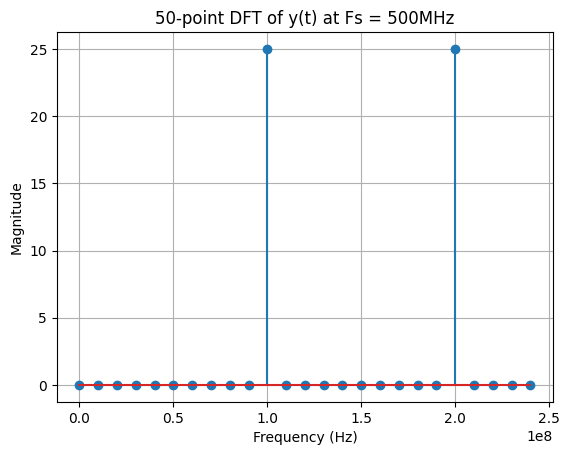

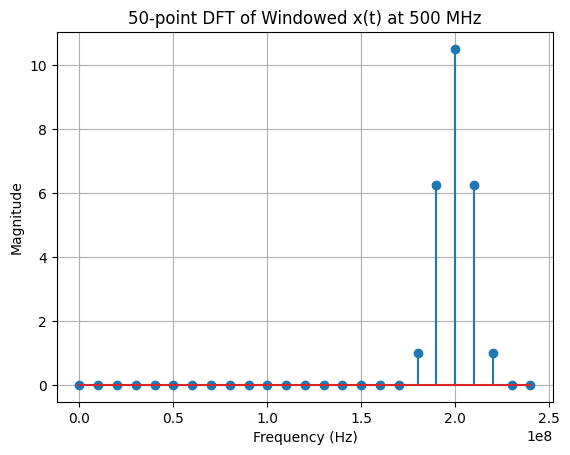

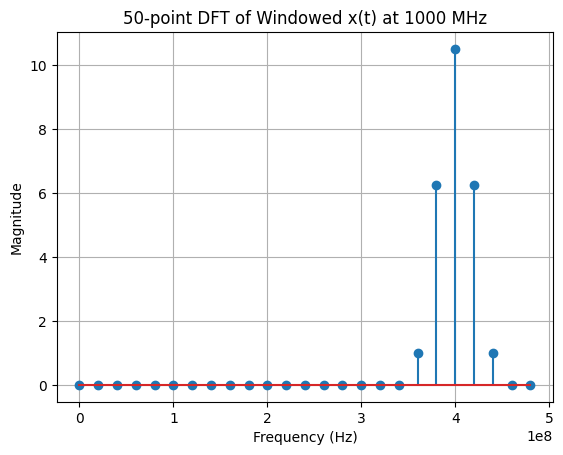

In [53]:
'''3a) Consider the signal x(t) = cos( 2π ∙ F ∙ t) where F = 2MHz. Sample the
signal at Fs = 5MHz. Compute a 50 point DFT in Python and plot the
output. (see fft command in SciPy documentation).


3b) Consider another signal y(t) = cos( 2π ∙ F1 ∙ t) + cos( 2π ∙ F2 ∙ t)
where F1 = 200MHz and F2 = 400MHz. Sample this signal at Fs = 1GHz.
Compute and plot a 50 point DFT. Can you identify the two components
of the signal in the plot?

3c) Repeat b. using Fs = 500MHz. Explain what you observe in your DFT plot.

3d) Now apply a Blackman window as an envelope to the signal x(t) and y(t)
and repeat the analysis. Please explain the differences.
'''

#3a
F = 2e6  # Frequency of the signal
Fs = 5e6  # Sampling frequency
t = np.arange(0, 10e-6, 1/Fs)
x = np.cos(2 * np.pi * F * t)
# Compute 50-point DFT
N = 50
X = np.fft.fft(x, n=N)
frequencies = np.fft.fftfreq(N, d=1/Fs)
# Plot DFT
plt.figure()
plt.stem(frequencies[:N//2], np.abs(X[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('50-point DFT of x(t) = cos(2π * 2MHz * t)')
plt.grid(True)
plt.show()
#3b
F1 = 200e6  # Frequency of first component
F2 = 400e6  # Frequency of second component
Fs = 1e9  # Sampling frequency
t = np.arange(0, 1e-6, 1/Fs)
y = np.cos(2 * np.pi * F1 * t) + np.cos(2 * np.pi * F2 * t)
# Compute 50-point DFT
N = 50
Y = np.fft.fft(y, n=N)
frequencies = np.fft.fftfreq(N, d=1/Fs)
# Plot DFT
plt.figure()
plt.stem(frequencies[:N//2], np.abs(Y[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('50-point DFT of y(t) = cos(2π * 200MHz * t) + cos(2π * 400MHz * t)')
plt.grid(True)
plt.show()
#3c
Fs = 500e6  # Sampling frequency    
t = np.arange(0, 1e-6, 1/Fs)
y = np.cos(2 * np.pi * F1 * t) + np.cos(2 * np.pi * F2 * t)
# Compute 50-point DFT
N = 50
Y = np.fft.fft(y, n=N)
frequencies = np.fft.fftfreq(N, d=1/Fs)
# Plot DFT
plt.figure()
plt.stem(frequencies[:N//2], np.abs(Y[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('50-point DFT of y(t) at Fs = 500MHz')
plt.grid(True)
plt.show()
#3d
# Apply Blackman window for c 
window = np.blackman(len(x))
x_windowed = x * window
# Compute 50-point DFT of windowed signal
X_windowed = np.fft.fft(x_windowed, n=N)
frequencies = np.fft.fftfreq(N, d=1/Fs)
# Plot DFT of windowed signal
plt.figure()
plt.stem(frequencies[:N//2], np.abs(X_windowed[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('50-point DFT of Windowed x(t) at 500 MHz')
plt.grid(True)
plt.show()
Fs = 1e9  # Sampling frequency
# Apply Blackman window for c 
window = np.blackman(len(x))
x_windowed = x * window
# Compute 50-point DFT of windowed signal
X_windowed = np.fft.fft(x_windowed, n=N)
frequencies = np.fft.fftfreq(N, d=1/Fs)
# Plot DFT of windowed signal
plt.figure()
plt.stem(frequencies[:N//2], np.abs(X_windowed[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('50-point DFT of Windowed x(t) at 1000 MHz')
plt.grid(True)
plt.show()



**3b**
Yes, the two components of the signal can be identified in the DFT plot as distinct peaks at their respective frequencies, 200MHz and 400MHz. The DFT effectively decomposes the signal into its frequency components, allowing us to see the individual contributions of each cosine wave in the combined signal.

**3c** 
When the sampling frequency is reduced to 500MHz, the DFT plot may exhibit aliasing effects. Since the Nyquist frequency is now 250MHz (half of the sampling frequency), the 400MHz component of the signal will be aliased back into the frequency range below 250MHz. This results in a distorted representation of the original signal in the DFT plot, making it difficult to accurately identify the original frequency components.

**3d**
Applying a Blackman window to the signal before computing the DFT helps to reduce spectral leakage. The Blackman window tapers the edges of the signal, minimizing discontinuities at the boundaries and thus reducing leakage. As a result, the DFT of the windowed signal shows sharper peaks at the true frequency components, providing a clearer representation of the signal's frequency content compared to the unwindowed DFT.

In [54]:
#Pole and root finder function used for Part 1

import numpy as np
from scipy import signal

def analyze_zpk(name, b, a):
    # Calculate Zeros, Poles, and Gain
    z, p, k = signal.tf2zpk(b, a)
    
    print(f"--- System {name} ---")
    print(f"Numerator (b):   {b}")
    print(f"Denominator (a): {a}")
    print(f"\nZeros:\n{np.round(z, 4)}")
    
    # Check for implicit poles at origin for FIR filters
    if len(a) == 1 and len(b) > 1:
        num_origin_poles = len(b) - 1
        print(f"\nPoles:\n[0. 0. ... ] ({num_origin_poles} poles at z=0)")
        print("(Note: scipy.signal.tf2zpk returns empty poles for FIR, but causality implies poles at origin)")
    else:
        print(f"\nPoles:\n{p}")
    print("-" * 40)

# --- Define Arrays ---
b1 = np.array([1, 1, 1, 1, 1])
a1 = np.array([1])

b0 = np.array([1, 1])
a0 = np.array([1, -1])

# --- Run Analysis ---
analyze_zpk("b0, a0", b0, a0)
analyze_zpk("b1, a1", b1, a1)


--- System b0, a0 ---
Numerator (b):   [1 1]
Denominator (a): [ 1 -1]

Zeros:
[-1.]

Poles:
[1.]
----------------------------------------
--- System b1, a1 ---
Numerator (b):   [1 1 1 1 1]
Denominator (a): [1]

Zeros:
[ 0.309+0.9511j  0.309-0.9511j -0.809+0.5878j -0.809-0.5878j]

Poles:
[0. 0. ... ] (4 poles at z=0)
(Note: scipy.signal.tf2zpk returns empty poles for FIR, but causality implies poles at origin)
----------------------------------------


AD2 Based Lab Measurements: 
1. Setup one of the AD2 AWGs (arbitrary waveform generators) to generate the sinewave signal as in 3(a).  
2. Drive the signal into one of the scope ports. Sample and quantize the input signal with the internal ADC, plot the result. (i.e plot the signal in the scope view) 
3. Plot the 256 sample DFT in Waveforms.  Hint: The number of frequency bins is half the number of FFT samples minus 1 and the stop frequency of the spectrum analyzer is half of the sampling rate.  
4. State what you see in the DFT? 
5. Setup the AD2 AWG to generate a noise signal at the same frequency as the sine wave from 2(a). 
6. Repeat the plot from step 3.  
7. State what you see in the DFT? 


**Sine**

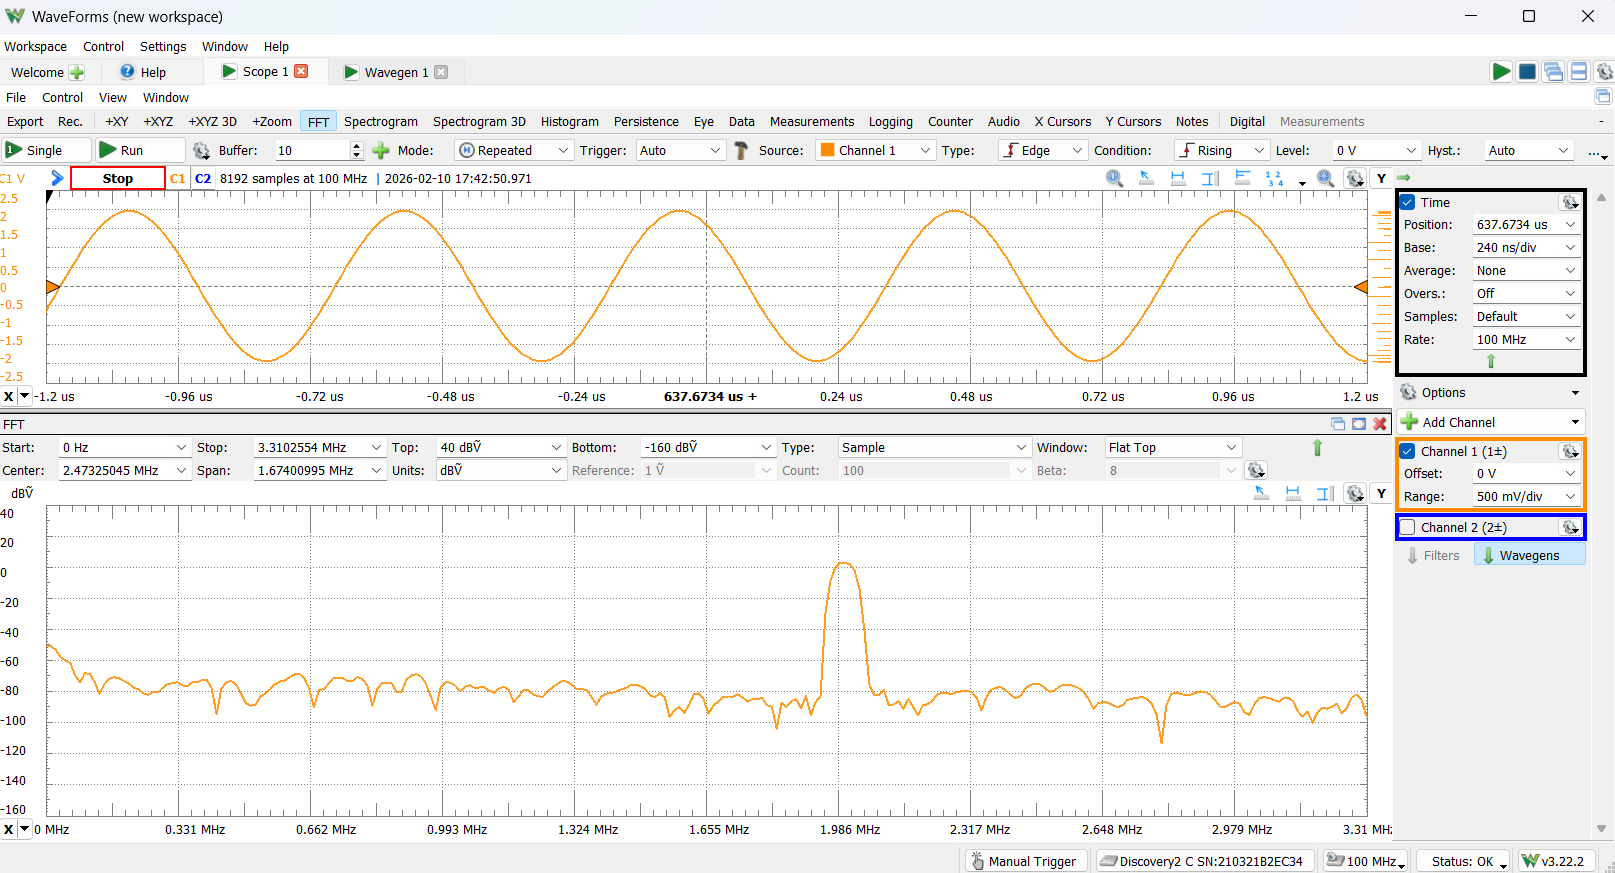

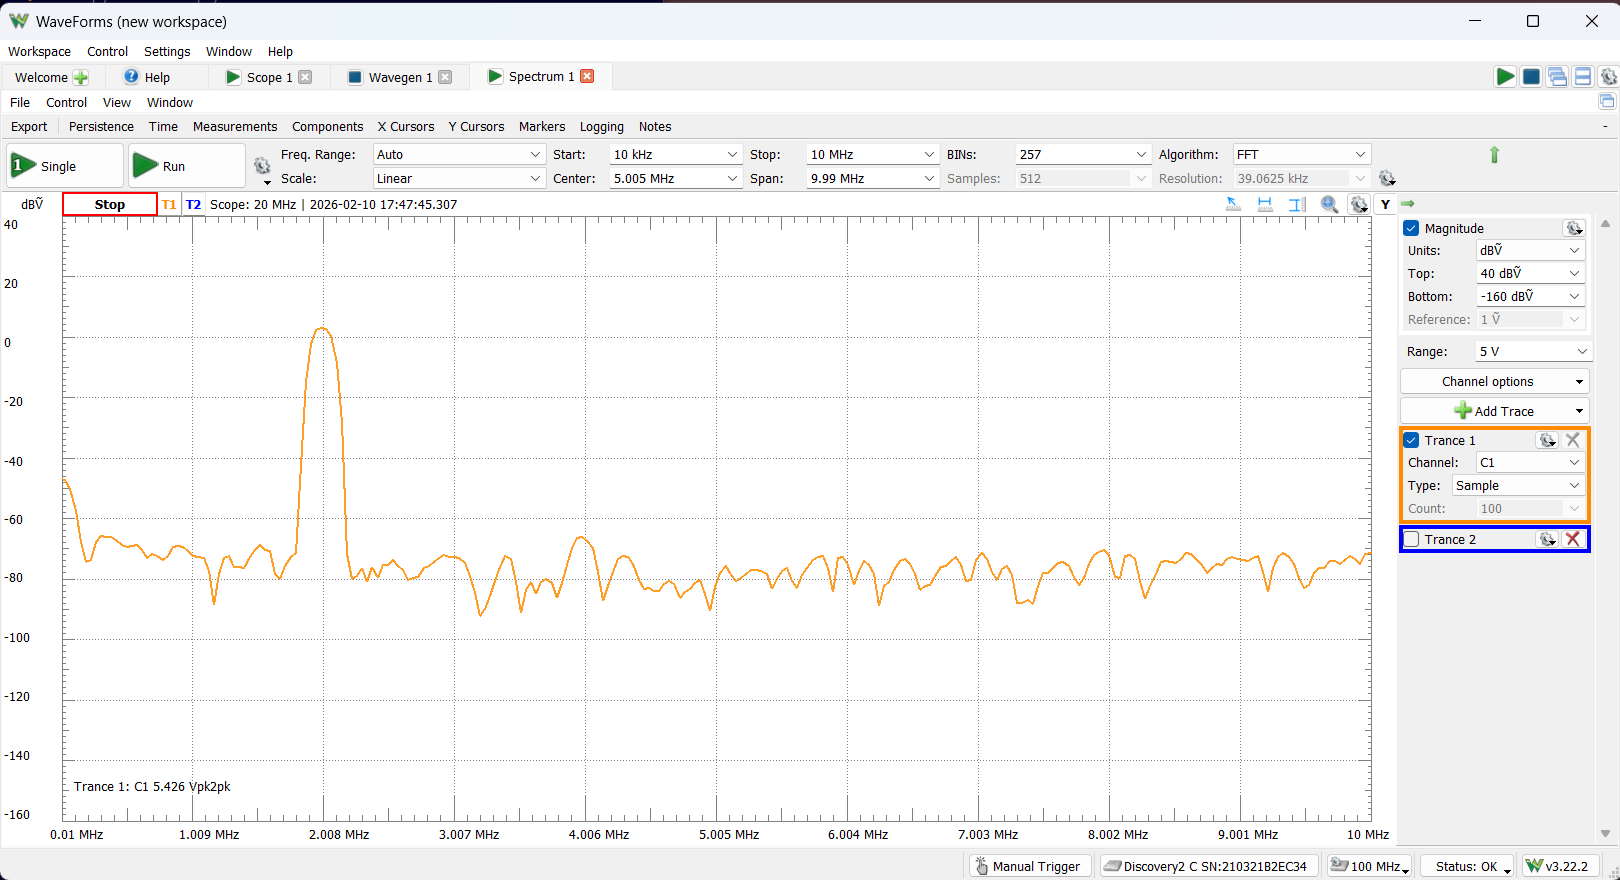
The rest of the frequency bins have very low magnitude, representing the noise floor of the system and quantization noise while the correct magnitude is at the resonant frequency of 2MHz.
**Noise**
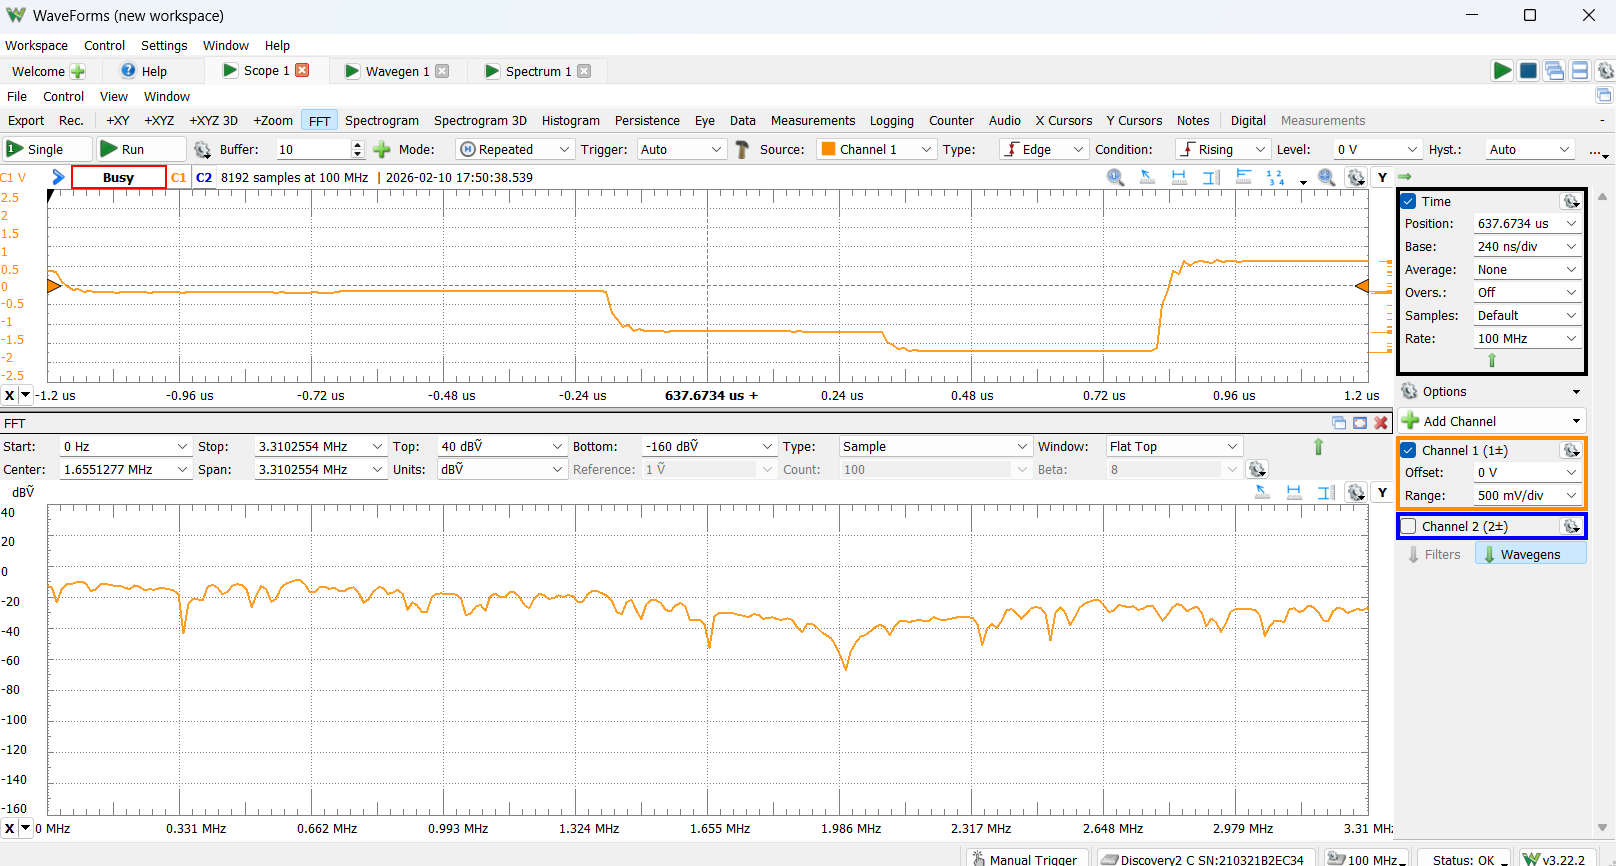
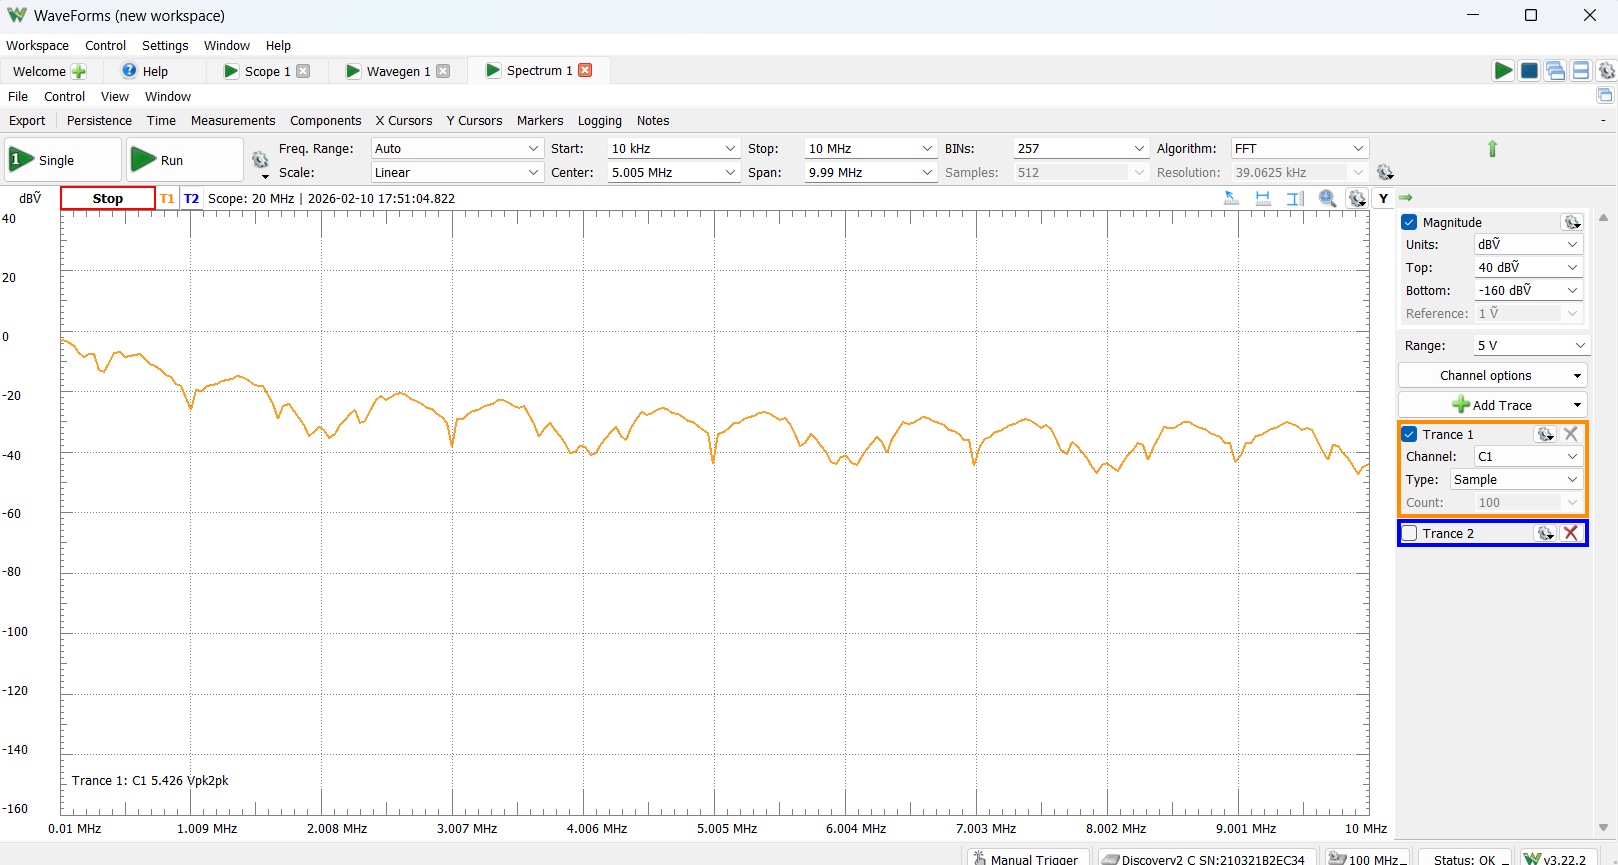

Here, the magnitude is distributed evenly across all frequency bins since it is not a concentrated signal